<a href="https://colab.research.google.com/github/SWADESH-KUMAR-NATH/BRAIN-HEMORRHAGE-PERCENTAGE-ESTIMATION-WITH-PYTHON/blob/main/Brain_hemorrhage_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SET UP

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive/My Drive/colab/my_work'

/content/drive/My Drive/colab/my_work


In [8]:
ls

hackerank.ipynb  normal_brain.jpg  Untitled1.ipynb
hmrg_brain.jpg   Untitled0.ipynb


importing necessary libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
img=cv2.imread('hmrg_brain.jpg')

Text(0.5, 1.0, 'Original Image')

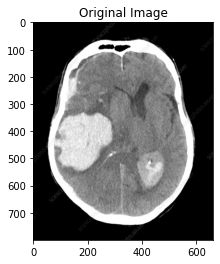

In [13]:
plt.imshow(img)
plt.title('Original Image')

# Image Processing
Color filter

Text(0.5, 1.0, 'color filter')

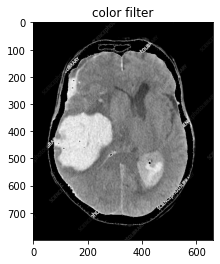

In [14]:
dim_grey = np.array([0,0,0])
light_grey= np.array([250,250,250])
excluding_part = cv2.inRange(img,dim_grey,light_grey)
clr_fltr=cv2.bitwise_and(img,img,mask=excluding_part)
plt.imshow(clr_fltr)
plt.title('color filter')

Erosion

Text(0.5, 1.0, 'Erosion')

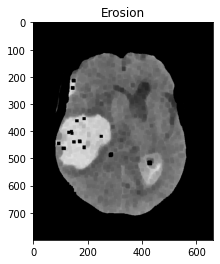

In [15]:
kernel=np.ones((3,3),np.uint8)
ersn=cv2.erode(clr_fltr,kernel,iterations=5)
plt.imshow(ersn)
plt.title('Erosion')

Dialation

Text(0.5, 1.0, 'Dilation')

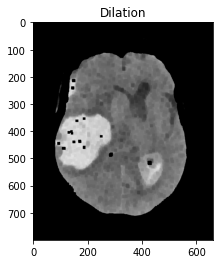

In [23]:
dltn=cv2.dilate(ersn,kernel,iterations=1)
plt.imshow(dltn)
plt.title('Dilation')

Cropping

Text(0.5, 1.0, 'crop')

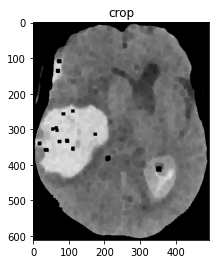

In [19]:
gray = cv2.cvtColor(dltn, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (11,11))
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
contours,hierarchy = cv2.findContours(thresh, 1, 2)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w>300 and h>300:
        break
crop = dltn[y:y+h, x:x+w]
plt.imshow(crop)
plt.title('crop')

Median filter

Text(0.5, 1.0, 'Median')

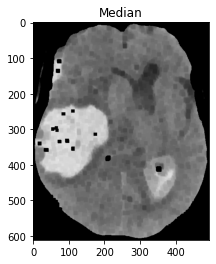

In [20]:
median = cv2.medianBlur(crop, ksize=1)
plt.imshow(median)
plt.title('Median')

Threshold Binary

Text(0.5, 1.0, 'Hemorrhage area')

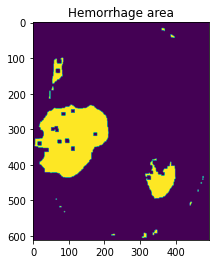

In [21]:
median = cv2.cvtColor(median,cv2.COLOR_BGR2GRAY)
ret1,threshold1 = cv2.threshold(median,150,255,cv2.THRESH_BINARY)
ret3,threshold1 = cv2.threshold(threshold1,50,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
ret4,threshold1 = cv2.threshold(threshold1,50,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
ret2,threshold2 = cv2.threshold(median,0,255,cv2.THRESH_BINARY)
plt.imshow(threshold1)
plt.title('Hemorrhage area')

Text(0.5, 1.0, 'Brain Area')

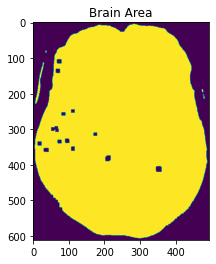

In [22]:
plt.imshow(threshold2)
plt.title('Brain Area')

Area and Percentage Counting

In [25]:
area1 = cv2.countNonZero(threshold1)
area2 = cv2.countNonZero(threshold2)
print("Hemorrhage area          : ",area1)
print('Total brain area         : ',area2)
print('Percentage of Hemorrhage : ',area1*100/area2,'%')

Hemorrhage area          :  35241
Total brain area         :  228034
Percentage of Hemorrhage :  15.454274362595052 %
